## 下載股價的方式 https://medium.com/%E5%B7%A5%E7%A8%8B%E9%9A%A8%E5%AF%AB%E7%AD%86%E8%A8%98/5%E7%A8%AE%E6%8A%93%E5%8F%96%E5%8F%B0%E8%82%A1%E6%AD%B7%E5%8F%B2%E8%82%A1%E5%83%B9%E7%9A%84%E6%96%B9%E6%B3%95-766bf2ed9d6

### 證交所 https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html
### 櫃買 https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43.php?l=zh-tw



In [1]:
import pandas as pd
import requests, json
import matplotlib.pyplot as plt
import time

from datetime import datetime
from dateutil.relativedelta import relativedelta

## 爬蟲抓股價

In [4]:
date = '20111201'
stock_no = '0050'

html = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=%s&stockNo=%s' % (date,stock_no))
content = json.loads(html.text)
print(content)
print(content['data'])
stock_data = content['data']
col_name = content['fields']

df = pd.DataFrame(data=stock_data, columns=col_name)
df.head()

{'stat': 'OK', 'date': '20111201', 'title': '100年12月 0050 元大台灣50       各日成交資訊', 'fields': ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], 'data': [['100/12/01', '50,086,140', '2,509,004,542', '49.60', '50.60', '49.60', '50.30', '+2.22', '12,683'], ['100/12/02', '11,022,944', '549,622,522', '50.10', '50.25', '49.60', '49.82', '-0.48', '3,499'], ['100/12/05', '9,432,964', '467,489,757', '49.82', '49.82', '49.20', '49.66', '-0.16', '2,772'], ['100/12/06', '14,698,444', '719,937,774', '49.50', '49.50', '48.67', '48.69', '-0.97', '5,428'], ['100/12/07', '15,032,896', '739,326,758', '49.00', '49.33', '49.00', '49.20', '+0.51', '3,116'], ['100/12/08', '14,793,377', '720,228,258', '49.01', '49.01', '48.40', '48.86', '-0.34', '4,111'], ['100/12/09', '18,170,218', '877,077,245', '48.00', '48.63', '48.00', '48.24', '-0.62', '5,042'], ['100/12/12', '12,180,038', '595,325,732', '48.94', '49.09', '48.63', '48.80', '+0.56', '2,920'], ['100/12/13', '9,930,657', '480,825,791', '48.3

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,100/12/01,"50,086,140","2,509,004,542",49.60,50.60,49.60,50.30,+2.22,"12,683"
1,100/12/02,"11,022,944","549,622,522",50.10,50.25,49.60,49.82,-0.48,"3,499"
2,100/12/05,"9,432,964","467,489,757",49.82,49.82,49.20,49.66,-0.16,"2,772"
3,100/12/06,"14,698,444","719,937,774",49.50,49.50,48.67,48.69,-0.97,"5,428"
4,100/12/07,"15,032,896","739,326,758",49.00,49.33,49.00,49.20,+0.51,"3,116"


In [5]:
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,111/01/03,"7,064,552","1,034,974,917",146.00,147.35,146.00,146.40,+0.90,"8,298"
1,111/01/04,"10,122,789","1,507,398,153",147.70,149.60,147.70,149.60,+3.20,"10,438"
2,111/01/05,"11,730,618","1,755,680,824",150.10,150.55,149.10,149.30,-0.30,"12,614"
3,111/01/06,"9,085,138","1,342,084,958",148.30,148.75,147.00,147.90,-1.40,"13,496"
4,111/01/07,"7,435,645","1,095,365,963",148.30,149.00,146.50,146.60,-1.30,"12,008"
5,111/01/10,"15,979,639","2,346,043,879",146.00,147.80,145.40,147.55,+0.95,"8,675"
6,111/01/11,"17,984,061","2,655,717,032",147.60,148.50,146.70,148.30,+0.75,"8,365"
7,111/01/12,"10,326,119","1,541,003,375",149.35,149.60,148.70,149.55,+1.25,"6,551"
8,111/01/13,"7,680,333","1,152,220,355",149.55,150.45,149.55,150.30,+0.75,"7,281"
9,111/01/14,"10,400,081","1,560,843,189",150.80,151.20,149.05,150.30,0.00,"9,178"


In [14]:
date_start = datetime(2010, 1, 1, 0, 0, 0)
date_new = date_start + relativedelta(months=+1)

date_time = date_new.strftime("%Y%m%d")
print(date_time)

20100201


In [ ]:
def getStock(date,stock_no):
    #date = '20220101'
    #stock_no = '0050'

    html = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=%s&stockNo=%s' % (date,stock_no))
    content = json.loads(html.text)
    stock_data = content['data']
    col_name = content['fields']
    return col_name, stock_data


date_start = datetime(2010, 1, 1, 0, 0, 0)
stock_no = '0050'
allData = []
for i in range(12*11+1):
    date = date_start + relativedelta(months = i)
    date_string = date.strftime("%Y%m%d")
    print(date_string)
    col_name, stock_data = getStock(date_string, stock_no)
    allData.append(stock_data)
    time.sleep(3)

    

flat_list = [item for sublist in allData for item in sublist]
df_0050 = pd.DataFrame(data=flat_list, columns=col_name)

df_0050    


In [12]:
df_0050.columns

Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')

In [29]:
df_0050.dtypes

日期       object
成交股數      int32
成交金額      int64
開盤價     float64
最高價     float64
最低價     float64
收盤價     float64
漲跌價差     object
成交筆數      int32
dtype: object

In [21]:
df_0050['開盤價'] = df_0050['開盤價'].astype(float)
df_0050['最高價'] = df_0050['最高價'].astype(float)
df_0050['最低價'] = df_0050['最低價'].astype(float)
df_0050['收盤價'] = df_0050['收盤價'].astype(float)

In [ ]:
df_0050['成交股數'] = df_0050['成交股數'].str.replace(',', '').astype(int)
df_0050['成交筆數'] = df_0050['成交筆數'].str.replace(',', '').astype(int)


In [28]:
df_0050['成交金額'] = df_0050['成交金額'].str.replace(',', '').astype('int64')

In [30]:
# 將0050存檔
df_0050.to_csv('0050.csv',index=False)

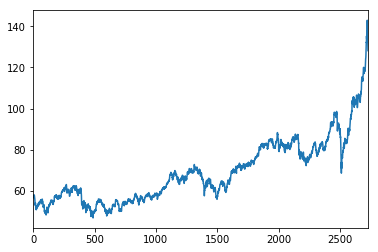

In [34]:
df_0050['收盤價'].plot()

# 櫃買中心 00679B

In [10]:
date = '106/01'
stock_no = '00679B'

#tpex_url = 'https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43_result.php?l=zh-tw&d=106/03&stkno=00679B'

#html = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=%s&stockNo=%s' % (date,stock_no))
html = requests.get('https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43_result.php?l=zh-tw&d=%s&stkno=%s' %  (date,stock_no) )
#html = requests.get(tpex_url)
content = json.loads(html.text)
stock_data = content['aaData']
col_name = ['日期','成交仟股','成交仟元','開盤','最高','最低','收盤','漲跌','筆數']
df = pd.DataFrame(data=stock_data, columns=col_name)
#df.head()
df


,日期,成交仟股,成交仟元,開盤,最高,最低,收盤,漲跌,筆數
0,106/01/17＊,928,"36,833",39.70,39.78,39.51,39.69,0.13,225
1,106/01/18,601,"23,856",39.66,39.72,39.65,39.65,-0.04,114
2,106/01/19,"1,001","39,362",39.50,39.50,39.26,39.35,-0.30,102
3,106/01/20,261,"10,177",39.05,39.06,38.92,38.92,-0.43,73
4,106/01/23,338,"13,172",38.93,38.99,38.88,38.88,-0.04,39
5,106/01/24,861,"33,637",39.07,39.11,39.02,39.09,0.21,85


In [35]:
#抓取上櫃中心的股價

def getStock_tpex(date,stock_no):

    #date = '106/01'
    #stock_no = '00679B'

    html = requests.get('https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43_result.php?l=zh-tw&d=%s&stkno=%s' %  (date,stock_no) )
    content = json.loads(html.text)
    stock_data = content['aaData']
    
    return stock_data
    #df = pd.DataFrame(data=stock_data, columns=col_name)
    #df.head()
    #df

stock_no = '00679B'
col_name = ['日期','成交仟股','成交仟元','開盤','最高','最低','收盤','漲跌','筆數']    
date_start = datetime(2017, 1, 1, 0, 0, 0)
allData = []
for i in range(12*5+1):
    date_new = date_start + relativedelta(months = i)

    #西元轉民國
    year = date_new.strftime("%Y")
    month = date_new.strftime("%m")
    
    year = str(int(year)-1911)
    date_string = year+'/'+month
    print(date_string)
    stock_data = getStock_tpex(date_string, stock_no)
    allData.append(stock_data)

    
flat_list = [item for sublist in allData for item in sublist]
df_00679B = pd.DataFrame(data=flat_list, columns=col_name)
#df.head()
df_00679B   

106/01
106/02
106/03
106/04
106/05
106/06
106/07
106/08
106/09
106/10
106/11
106/12
107/01
107/02
107/03
107/04
107/05
107/06
107/07
107/08
107/09
107/10
107/11
107/12
108/01
108/02
108/03
108/04
108/05
108/06
108/07
108/08
108/09
108/10
108/11
108/12
109/01
109/02
109/03
109/04
109/05
109/06
109/07
109/08
109/09
109/10
109/11
109/12
110/01
110/02
110/03
110/04
110/05
110/06
110/07
110/08
110/09
110/10
110/11
110/12
111/01


,日期,成交仟股,成交仟元,開盤,最高,最低,收盤,漲跌,筆數
0,106/01/17＊,928,"36,833",39.70,39.78,39.51,39.69,0.13,225
1,106/01/18,601,"23,856",39.66,39.72,39.65,39.65,-0.04,114
2,106/01/19,"1,001","39,362",39.50,39.50,39.26,39.35,-0.30,102
3,106/01/20,261,"10,177",39.05,39.06,38.92,38.92,-0.43,73
4,106/01/23,338,"13,172",38.93,38.99,38.88,38.88,-0.04,39
5,106/01/24,861,"33,637",39.07,39.11,39.02,39.09,0.21,85
6,106/02/02,639,"24,503",38.36,38.37,38.28,38.37,-0.72,54
7,106/02/03,"1,286","49,040",38.18,38.19,38.09,38.13,-0.24,87
8,106/02/06,833,"31,631",38.01,38.01,37.90,37.96,-0.17,78
9,106/02/07,399,"15,302",38.27,38.37,38.25,38.34,0.38,53


In [39]:
df_00679B.dtypes

日期      object
成交仟股    object
成交仟元    object
開盤      object
最高      object
最低      object
收盤      object
漲跌      object
筆數      object
dtype: object

In [40]:
df_00679B['日期'] = df_00679B['日期'].str.replace('＊', '')

In [41]:
df_00679B['開盤'] = df_00679B['開盤'].astype(float)
df_00679B['最高'] = df_00679B['最高'].astype(float)
df_00679B['最低'] = df_00679B['最低'].astype(float)
df_00679B['收盤'] = df_00679B['收盤'].astype(float)
df_00679B['漲跌'] = df_00679B['漲跌'].astype(float)


In [42]:
df_00679B['筆數'] = df_00679B['筆數'].str.replace(',', '').astype(int)
df_00679B['成交仟股'] = df_00679B['成交仟股'].str.replace(',', '').astype(int)
df_00679B['成交仟元'] = df_00679B['成交仟元'].str.replace(',', '').astype(int)

In [43]:
df_00679B.dtypes

日期       object
成交仟股      int32
成交仟元      int32
開盤      float64
最高      float64
最低      float64
收盤      float64
漲跌      float64
筆數        int32
dtype: object

In [44]:
df_00679B

,日期,成交仟股,成交仟元,開盤,最高,最低,收盤,漲跌,筆數
0,106/01/17,928,36833,39.70,39.78,39.51,39.69,0.13,225
1,106/01/18,601,23856,39.66,39.72,39.65,39.65,-0.04,114
2,106/01/19,1001,39362,39.50,39.50,39.26,39.35,-0.30,102
3,106/01/20,261,10177,39.05,39.06,38.92,38.92,-0.43,73
4,106/01/23,338,13172,38.93,38.99,38.88,38.88,-0.04,39
5,106/01/24,861,33637,39.07,39.11,39.02,39.09,0.21,85
6,106/02/02,639,24503,38.36,38.37,38.28,38.37,-0.72,54
7,106/02/03,1286,49040,38.18,38.19,38.09,38.13,-0.24,87
8,106/02/06,833,31631,38.01,38.01,37.90,37.96,-0.17,78
9,106/02/07,399,15302,38.27,38.37,38.25,38.34,0.38,53


In [45]:
df_00679B.to_csv('00679B.csv',index=False)

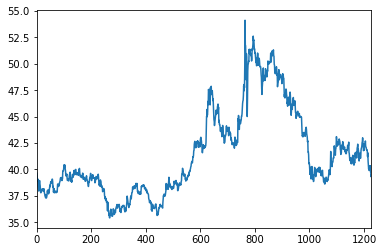

In [46]:
df_00679B['收盤'].plot()

## 用套件抓股價

In [48]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Read Data
test = data.DataReader(['0050.TW','00679B.TWO'], 'yahoo', start='2017/01/11', end='2021/12/31')
test.head()

Attributes  Adj Close                 Close                  High             \
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO   
Date                                                                           
2017-01-11  72.400002  39.998798  72.400002  39.998798  72.849998  39.998798   
2017-01-12  73.150002  39.790501  73.150002  39.790501  73.300003  39.790501   
2017-01-13  72.599998  39.560101  72.599998  39.560101  72.800003  39.560101   
2017-01-16  72.000000        NaN  72.000000        NaN  72.400002        NaN   
2017-01-17  72.300003  39.689999  72.300003  39.689999  72.400002  39.779999   

Attributes        Low                  Open                Volume             
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO  
Date                                                                          
2017-01-11  72.400002  39.998798  72.800003  39.998798  1898053.0        0.0  
2017-01-12  72.599998  39.790501  72.599998  39.790501  4857459.0        0.0  
2017-01-13  72.599998  39.560101  72.800003  39.560101  3909860.0        0.0  
2017-01-16  71.800003        NaN  72.400002        NaN  2418439.0        NaN  
2017-01-17  72.000000  39.509998  72.000000  39.700001  1572741.0   928000.0

In [55]:
len(test)

1213